<a href="https://colab.research.google.com/github/syahrinalfi/MachineLearningTasks/blob/main/8thWeekTasks/8_SVM_Heart_Failure_Clinical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Muhammad Alfi Syahrin
* NIM : 1103213144
* Lecture : 8
* Model : Support Vector Machine
* Dataset : [Heart Failure Clinical Records](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)


In [1]:
import pandas as pd
from google.colab import drive

In [3]:
# Mount drive dan baca data dari file CSV
drive.mount('/content/drive')
url = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Minggu 8/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


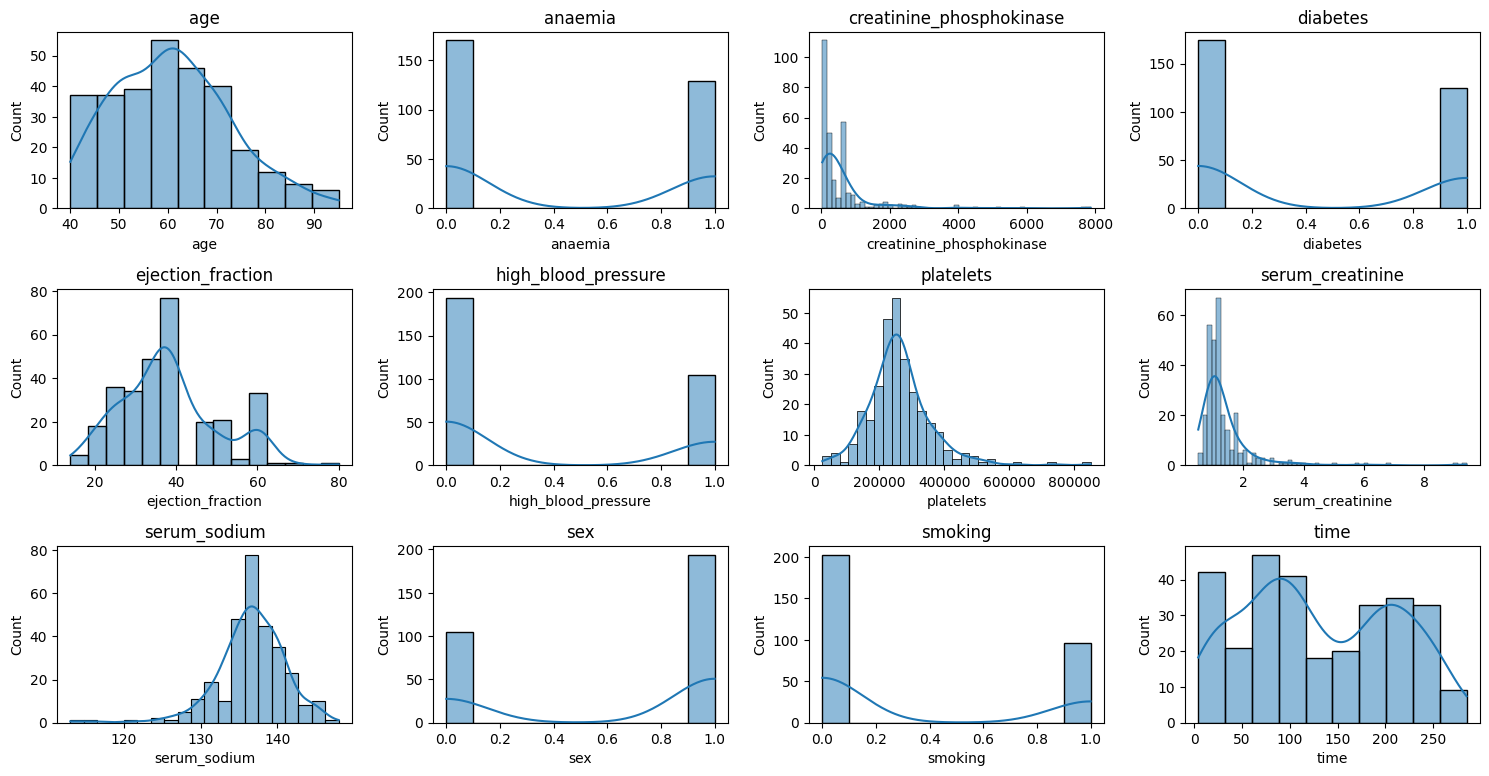

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan ukuran plot
plt.figure(figsize=(15, 10))

# Loop melalui setiap fitur kecuali DEATH_EVENT karena itu adalah variabel target
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

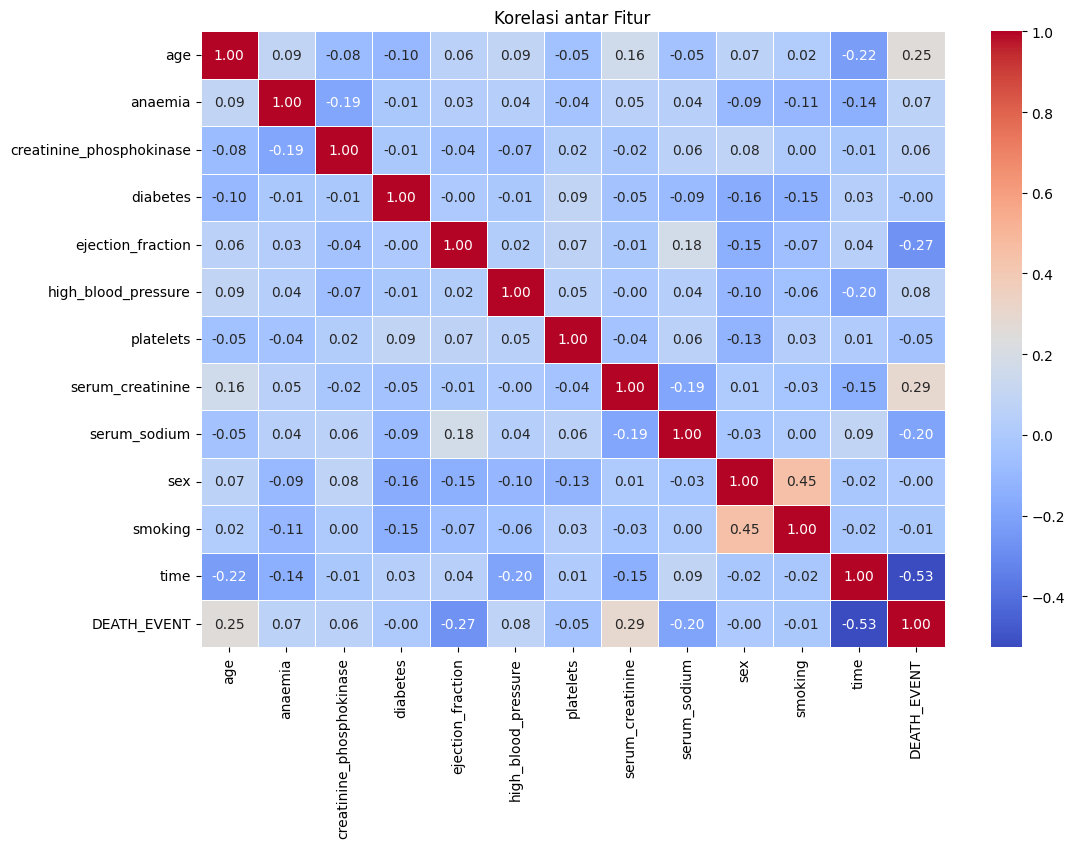

In [8]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antar Fitur')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur dan target
X = df.drop(columns=['DEATH_EVENT'])  # Fitur
y = df['DEATH_EVENT']  # Target

# Memisahkan data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model
svm_model.fit(X_train, y_train)

# Memprediksi data test
y_pred = svm_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60


Confusion Matrix:
[[32  3]
 [12 13]]


- Dapat diketahui hasil pelatihan model menggunakan setting kernel linear menghasilkan akurasi sebesar 75%. Oleh karena itu, perlu melakukan hyperparameter tuning untuk meningkatkan akurasi.

In [11]:
# List hyperparameter yang akan diuji untuk setiap kernel
hyperparameters = [
    {'kernel': 'linear', 'C': 1.0},                   # Model 1
    {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'},    # Model 2
    {'kernel': 'poly', 'C': 1.0, 'degree': 3},        # Model 3
    {'kernel': 'sigmoid', 'C': 1.0},                  # Model 4
]

# Membuat dan mengevaluasi model untuk setiap setting hyperparameter
for i, params in enumerate(hyperparameters, 1):
    print(f"Model {i}: {params}")
    # Membuat model SVM
    svm_model = SVC(**params, random_state=42)
    # Melatih model
    svm_model.fit(X_train, y_train)
    # Memprediksi data test
    y_pred = svm_model.predict(X_test)
    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Menampilkan classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    # Menampilkan confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-----------------------------------------")


Model 1: {'kernel': 'linear', 'C': 1.0}
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        35
           1       0.81      0.52      0.63        25

    accuracy                           0.75        60
   macro avg       0.77      0.72      0.72        60
weighted avg       0.76      0.75      0.74        60


Confusion Matrix:
[[32  3]
 [12 13]]
-----------------------------------------
Model 2: {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'}
Accuracy: 0.5833333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60


Confusion Matrix:
[[35  0]
 [25  0]]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

- Dari hasil semua setting hyperparameter yang dicoba, dapat diketahui bahwa kernel tipe linear dengan nilai C = 1 memiliki peringkat teratas dengan akurasi 75% dibanding yang lainnya dengan akurasi ~58%.